<a href="https://colab.research.google.com/github/fatihonay/Deep-Learning-Journey/blob/main/docs/source/Pytorch/Baby_NeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baby ANN
Pytorch library is specialized to build neural networks with efficient computing strategies. Now, we begin to discover features of this library by building simple neural networks.

Let's import libraries/dependencies to study.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

We will define python class for building our `Model`.  Our model consists of;

*   1 input layer
*   2 hidden layers
*   1 output layer

Let's see details of how to create this model.

In [2]:
class Model(nn.Module):
  def __init__(self, input_features = 4, hid_1 = 8, hid_2 = 9, out_features = 3): #
    super().__init__() # Standard to instantiate nn.Module

    # We will create layers of the model
    self.fc1 = nn.Linear(input_features, hid_1)
    self.fc2 = nn.Linear(hid_1, hid_2)
    self.out = nn.Linear(hid_2, out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# Assign model variable
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

We did it ! We built our baby neural network. Now we will train it. I believe that it will learn and make clever decisions. This is our baby. We will carefully train it. So, lets's find some data four our baby model.

In [3]:
import pandas as pd

# We will get data from GithubGist, iris flower dataset, easy one :)
url          = 'https://gist.githubusercontent.com/martingaido/ae48d96850f2ed2696a6662aed2c0781/raw/d84f38fffe34413dd13dfef5953354c0b04d58e1/Iris.csv'
df_iris_data = pd.read_csv(url)

print(f'\n Number of classes: {df_iris_data["Species"].unique()}')
df_iris_data


 Number of classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


We loaded our dataset. As you can see, there are 4 features and 3 classes. Actually, that's why I created a model with 4 inputs and 3 outputs at the first place.
Data is good but we have a problem. Label of `classes` must be numeric to be used in model training. We need to convert labels into `numeric` format.

In [4]:
# Convert labels to numeric value
df_iris_data['Species'] = df_iris_data['Species'] .replace('Iris-setosa', 0)
df_iris_data['Species'] = df_iris_data['Species'] .replace('Iris-versicolor', 1)
df_iris_data['Species'] = df_iris_data['Species'] .replace('Iris-virginica', 2)
df_iris_data.head()

/tmp/ipython-input-1936319835.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_iris_data['Species'] = df_iris_data['Species'] .replace('Iris-virginica', 2)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


We prepared our data format for feasible deep learning application. Now, we should divide data into train and test sets. For this purpose,  `scikit-learn` library is super useful. When preparind dataset for deep learning models, we will always need `scikit-learn` library.

In [5]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df_iris_data.drop(['Species','Id'], axis = 1).values  # .values ---> convert dataframe into numpy arrays
y = df_iris_data['Species'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

# Convert features into the Float tensor format
X_train = torch.FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)


# Convert labels into the tensor
y_train = torch.LongTensor(y_train)
y_test  = torch.LongTensor(y_test)


I guess we are doing well ! Data is ready now. The next step is to choose training parameters which are `loss function`, `optimizer` and `learning rate`. These are the most simple parameters to train model.

In [6]:
# Create training parameters

loss_function = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = 0.01)


It was easy hah ! Let's continue. Our baby is waiting for us to feed it. We should not let it to stay hungry. Let's train it with a beuatiful data.

In the training phase, we will create multiple epochs of forward and back propogation to amke fine-tuning of network weights.


In [7]:
# Training baby neural network model

epochs    = 100
loss_vals = [] # for each epoch we will retain loss values into list

for i in range(epochs):

  y_pred = model.forward(X_train) # make prediction
  loss   = loss_function(y_pred, y_train) # calculate loss between prediction and target

  loss_vals.append(loss.detach().numpy())

  optimizer.zero_grad() # reset gradients
  loss.backward()       # back propogation
  optimizer.step()      # update weights

  if i % 10 == 0:
    print(f'Epoch number: {i} and the loss is {loss}')


Epoch number: 0 and the loss is 1.105826497077942
Epoch number: 10 and the loss is 0.9706932902336121
Epoch number: 20 and the loss is 0.7247124910354614
Epoch number: 30 and the loss is 0.4746554493904114
Epoch number: 40 and the loss is 0.31829097867012024
Epoch number: 50 and the loss is 0.1857929527759552
Epoch number: 60 and the loss is 0.10616753995418549
Epoch number: 70 and the loss is 0.07050111889839172
Epoch number: 80 and the loss is 0.05368215590715408
Epoch number: 90 and the loss is 0.04450855776667595


We did it ! We trained our model. Let's see how loss value changes at each epoch.

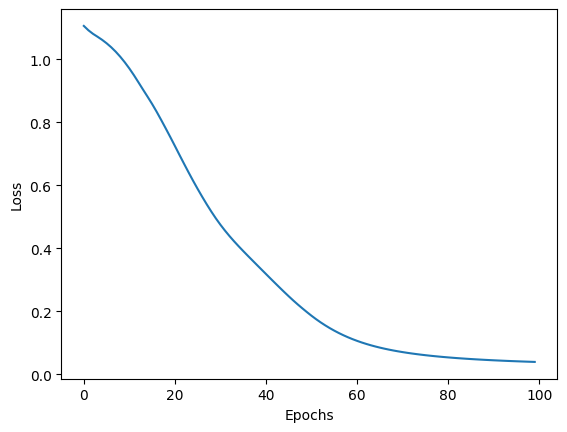

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), loss_vals)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()


We trained our neural network and tracked how loss decreases as training evolves throughout the epochs. Our model seems to be ready for challenge now. Let's test it with new test data.

In [16]:
# Testing model
correct = 0

for i, data in enumerate(X_test):
  y_val = model.forward(data)
  print(f'{i+1}) {data} --> {y_val.argmax()}')

  if y_val.argmax().item() == y_test[i]:
    correct += 1
    print('Correct Prediction')
  else:
    print('Wrong Prediction')

# Let's denote accuracy
accuracy = correct / len(y_test)
print(f'\n Accuracy: {accuracy}')


1) tensor([6.0000, 2.2000, 5.0000, 1.5000]) --> 2
Correct Prediction
2) tensor([6.4000, 2.8000, 5.6000, 2.1000]) --> 2
Correct Prediction
3) tensor([7.7000, 3.0000, 6.1000, 2.3000]) --> 2
Correct Prediction
4) tensor([6.1000, 3.0000, 4.6000, 1.4000]) --> 1
Correct Prediction
5) tensor([6.8000, 3.0000, 5.5000, 2.1000]) --> 2
Correct Prediction
6) tensor([6.1000, 2.8000, 4.0000, 1.3000]) --> 1
Correct Prediction
7) tensor([6.3000, 2.7000, 4.9000, 1.8000]) --> 2
Correct Prediction
8) tensor([6.0000, 3.4000, 4.5000, 1.6000]) --> 1
Correct Prediction
9) tensor([6.5000, 3.0000, 5.2000, 2.0000]) --> 2
Correct Prediction
10) tensor([6.8000, 3.2000, 5.9000, 2.3000]) --> 2
Correct Prediction
11) tensor([6.1000, 3.0000, 4.9000, 1.8000]) --> 2
Correct Prediction
12) tensor([5.1000, 3.4000, 1.5000, 0.2000]) --> 0
Correct Prediction
13) tensor([4.4000, 3.0000, 1.3000, 0.2000]) --> 0
Correct Prediction
14) tensor([5.0000, 2.3000, 3.3000, 1.0000]) --> 1
Correct Prediction
15) tensor([5.1000, 3.3000, 1

The accuracy of classification was 96.6%

This is not bad. Actually, we only say very fundamental example of traning and tesing the neural network model. However, this is a good starting point. We will see more complicated scenarios in the upcoming tutorials.
